# Сервис аренды самокатов GoFast

**Пути к файлам:**

users = `/datasets/users_go.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/users_go.csv);

rides = `/datasets/rides_go.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/rides_go.csv);

subscriptions = `/datasets/subscriptions_go.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/subscriptions_go.csv)

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

#### Шаг 1. Загрузка данных

In [53]:
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

In [54]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [55]:
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [56]:
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [57]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [58]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [59]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [60]:
users.describe()

,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


In [61]:
rides.describe()

,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


In [62]:
subscriptions.describe()

,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000


**В ходе первичного ознакомления с данными было установлено:**

1) в датафреймах отсутствуют пропуски, нужно проверить на наличие дубликатов.

2) необходимо изменить тип данных в столбце date на datetime;

3) название столбцов впорядке, изменять не нужно;

4) по сводной статистике видно, что присутствуют проблемы в данных: слишком маленькое расстояние (distance) и время одной поездки (duration). Скорее всего, это аномалии и их нужно обработать.


#### Шаг 2. Предобработка данных

In [63]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')

In [65]:
rides['date'].dt.year.unique() 

array([2021])

In [66]:
rides['month'] = pd.DatetimeIndex(rides['date']).month 

In [67]:
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


С написанием столбцов все впорядке, поэтому далее проверила каждый датафрейм на наличие пропусков и дубликатов.

In [68]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [69]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [70]:
subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Подсчет количества явных дубликатов.

In [71]:
users['user_id'].duplicated().sum()

31

In [72]:
rides.duplicated().sum()

0

In [73]:
subscriptions.duplicated().sum()

0

Удаление явных дубликатов в столбце users.

In [74]:
users = users.drop_duplicates(subset=['user_id'], keep='first')

In [75]:
users = users.reset_index(drop=True)

In [76]:
users['user_id'].duplicated().sum()

0

Исходя из описания данных, неявные дубликаты могут встречаться в столбце name. Вывела в алфавитном порядке встречающиеся в данных имена.

In [77]:
users['name'].value_counts().sort_index(ascending=True).index.tolist()

['Агата',
 'Аделина',
 'Адель',
 'Айдар',
 'Александр',
 'Александра',
 'Алексей',
 'Алина',
 'Алиса',
 'Алия',
 'Алла',
 'Альберт',
 'Альбина',
 'Алёна',
 'Амалия',
 'Амина',
 'Амир',
 'Анастасия',
 'Анатолий',
 'Ангелина',
 'Андрей',
 'Анжелика',
 'Анна',
 'Антон',
 'Антонина',
 'Ариана',
 'Арина',
 'Арсен',
 'Арсений',
 'Артемий',
 'Артур',
 'Артём',
 'Богдан',
 'Борис',
 'Вадим',
 'Валентина',
 'Валерий',
 'Валерия',
 'Варвара',
 'Василий',
 'Василина',
 'Василиса',
 'Вера',
 'Вероника',
 'Виктор',
 'Виктория',
 'Виолетта',
 'Виталий',
 'Виталина',
 'Влад',
 'Влада',
 'Владимир',
 'Владислав',
 'Владислава',
 'Всеволод',
 'Вячеслав',
 'Галина',
 'Георгий',
 'Герман',
 'Глеб',
 'Гордей',
 'Григорий',
 'Давид',
 'Дамир',
 'Даниил',
 'Данил',
 'Данила',
 'Даниэль',
 'Дарина',
 'Дарья',
 'Демид',
 'Денис',
 'Диана',
 'Дмитрий',
 'Ева',
 'Евгений',
 'Евгения',
 'Егор',
 'Екатерина',
 'Елена',
 'Елизавета',
 'Елисей',
 'Есения',
 'Жанна',
 'Зарина',
 'Захар',
 'Злата',
 'Иван',
 'Игнат',

Неявных дубликатов не обнаружено.

**В ходе предообработки данных:**

1) столбец date приведен к типу datetime;

2) создан новый столбец month с номером месяца;

3) пропуски в данных не обранурежны, явные дубликаты в столбе user_id удалены.

#### Шаг 3. Исследовательский анализ данных

In [78]:
users.pivot_table(index='city', values = 'user_id', aggfunc='count').sort_values(by='user_id', 
ascending=False).reset_index()

,city,user_id
0,Пятигорск,219
1,Екатеринбург,204
2,Ростов-на-Дону,198
3,Краснодар,193
4,Сочи,189
5,Омск,183
6,Тюмень,180
7,Москва,168


Text(0, 0.5, 'Город')

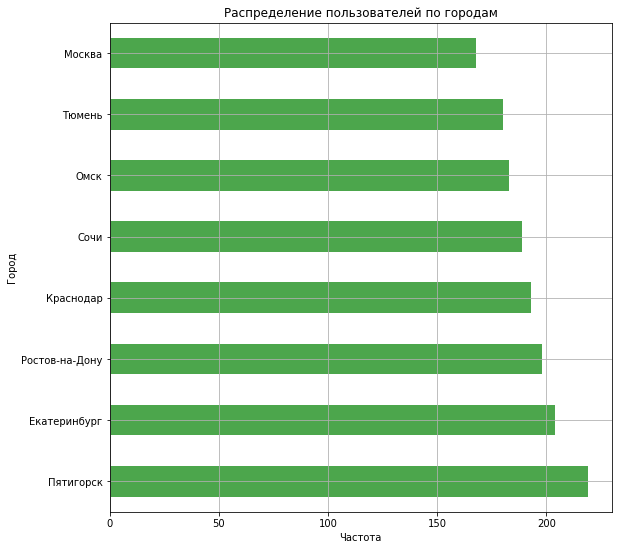

In [79]:
users_pivot = users.pivot_table(index='city', values = 'user_id', aggfunc='count').sort_values(by='user_id', 
ascending=False).reset_index().plot(kind='barh', 
x='city', y = 'user_id', figsize=(9,9), 
title='Распределение пользователей по городам', legend=False, grid=True, alpha=0.7, color='green')
plt.xlabel('Частота')
plt.ylabel('Город')

**Частота встречаемости городов:** чаще всего встречаются пользователи из Пятигорска, на последнем месте - Москва.
В южных регионах из-за погодных условий есть возможность дольше пользоваться самокатами (также на первых местах пользователи из Ростова-на-Дону, Краснодара и Сочи)

In [80]:
users.pivot_table(index='subscription_type', values = 'user_id', 
aggfunc='count').reset_index()

,subscription_type,user_id
0,free,835
1,ultra,699


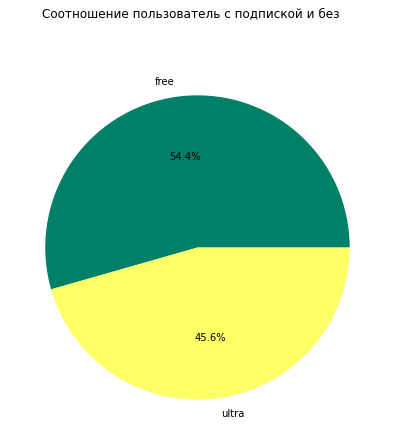

In [81]:
users.pivot_table(index='subscription_type', values = 'user_id', 
aggfunc='count').plot(kind='pie', figsize=(7,7), subplots=True,
autopct='%1.1f%%', title = 'Соотношение пользователь с подпиской и без', legend=False, cmap='summer')

ax = plt.gca()
ax.axes.yaxis.set_visible(False)

**Соотношение пользователей с подпиской и без подписки:** самокатами пользуются больше пользователей без подписки почти на 10%. 

Среди пользователей, вероятно, есть люди, не использующие самокаты регулярно и не мотивированные покупать подписку.

In [82]:
users.pivot_table(index='age', values = 'user_id', 
aggfunc='count').reset_index()

,age,user_id
0,12,4
1,13,8
2,14,9
3,15,13
4,16,19
5,17,26
6,18,46
7,19,47
8,20,71
9,21,93


Text(0, 0.5, 'Частота')

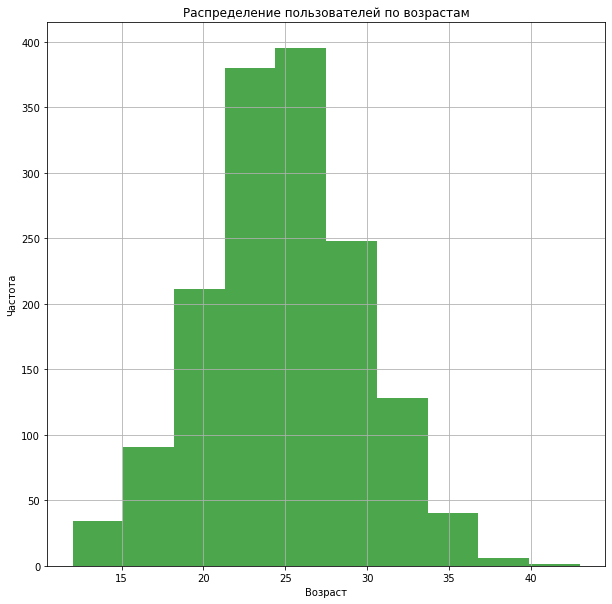

In [83]:
users.pivot_table(index='age', values = 'user_id', 
aggfunc='count').reset_index()
column_to_plot = 'age'
users_plot = users[column_to_plot]
users_plot.plot(kind='hist', title = 'Распределение пользователей по возрастам', grid=True, 
                figsize=(10,10), alpha=0.7, color='green')
plt.xlabel('Возраст')
plt.ylabel('Частота')

**Возраст пользователей**: чаще пользуются молодые люди в возрасте 23-27 лет. Люди после 30 встречаются реже так же, как и подростки.

Молодые люди более мобильны и располагают собственным доходом.

In [84]:
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1d94ee0460>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1d94efcbb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1d94ee0340>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1d95128970>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1d951285e0>],
 'means': []}

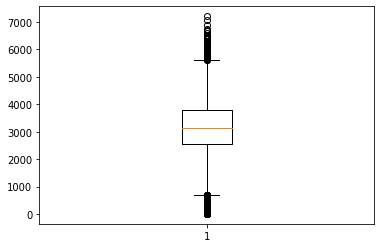

In [85]:
plt.boxplot(rides['distance'])

По диаграмме размаха расстояние до 200 метров можно определить как выброс, при построении гистограммы его лучше исключить: слишком короткие поездки, которые можно объяснить неисправностями самоката, нехваткой денег на балансе и др.

In [86]:
rides = rides.query('distance>=200')

Text(0, 0.5, 'Частота')

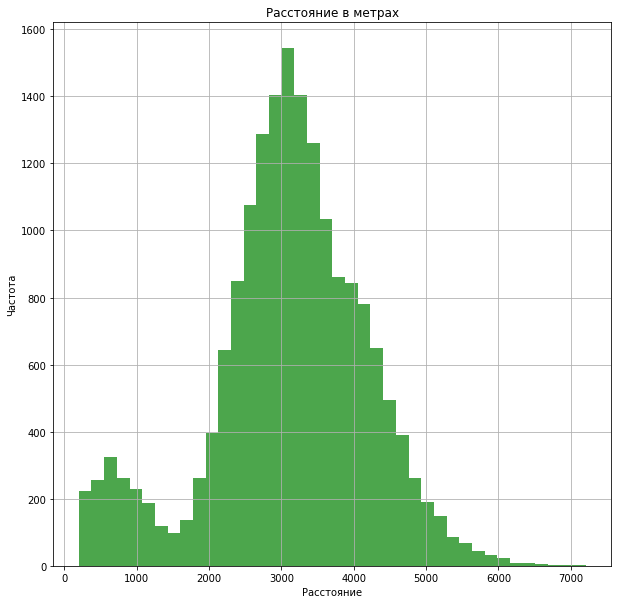

In [87]:
rides['distance'].plot(kind='hist', bins=40, title = 'Расстояние в метрах', grid=True, 
                figsize=(10,10), alpha=0.7, color='green')
plt.xlabel('Расстояние')
plt.ylabel('Частота')

**Расстояние, которое пользователь преодолел за одну поездку**: в среднем за одну поездку пользователи проезжают около 3000 метров (3 километров).

In [88]:
rides['duration'].describe()

count    17898.000000
mean        17.896443
std          6.035845
min          0.500000
25%         13.719722
50%         17.744270
75%         21.764322
max         40.823963
Name: duration, dtype: float64

Минимальное значение 0.5 минут выглядит неправдоподобно коротким, время до 3 минут можно исключить как аномалию.

In [89]:
rides = rides.query('duration>=3')

Text(0, 0.5, 'Частота')

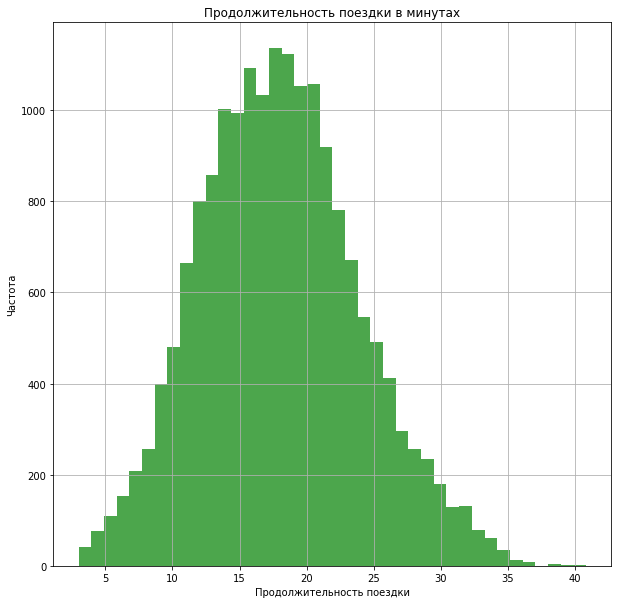

In [90]:
rides['duration'].plot(kind='hist', bins=40, title = 'Продолжительность поездки в минутах', grid=True, 
                figsize=(10,10), alpha=0.7, color='green')
plt.xlabel('Продолжительность поездки')
plt.ylabel('Частота')

**Продолжительность поездок**: в среднем время одной поездки занимает 18 минут.

**Среди пользователей самокатов чаще встречаются молодые люди в возрасте 24-26 лет, без подписки. Среднее время сессии - 18 минут, расстояние, которое пользователь преодолевает за одну поездку - 3000 метров. 
Большинство пользователь из Пятигорска, на последнем месте - Москва.**

#### Шаг 4. Объединение данных

Объединила данные о пользователях, поездках и подписках в один датафрейм. 

In [91]:
dt = users.merge(rides, on='user_id', how='outer') 

In [92]:
data = dt.merge(subscriptions, on = 'subscription_type', how='outer')
data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [93]:
users.shape[0]

1534

In [94]:
rides.shape[0]

17787

In [95]:
dt.shape[0]

17787

In [96]:
subscriptions.shape[0]

2

In [97]:
data.shape[0]

17787

Создала ещё два датафрейма из датафрейма, созданного на этапе 4.1:

1) c данными о пользователях без подписки;

2) с данными о пользователях с подпиской

In [98]:
users_free = data.query('subscription_type == "free"')
users_free.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


In [99]:
users_ultra = data.query('subscription_type == "ultra"')
users_ultra.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


Далее сравнила пользователь без подписки и с подпиской по расстоянию и времени поездок.

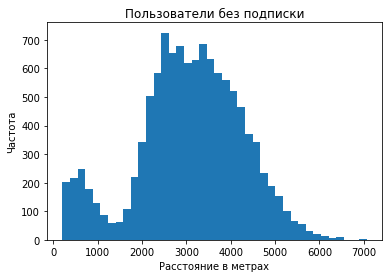

Text(0, 0.5, 'Частота')

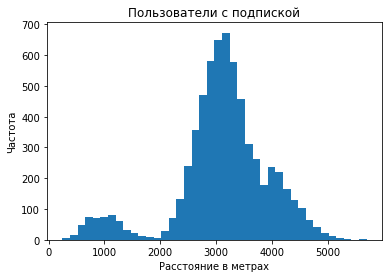

In [100]:
users_free['distance'].plot(kind='hist', bins=40, 
title = 'Пользователи без подписки')

plt.xlabel('Расстояние в метрах')
plt.ylabel('Частота')

plt.show()

users_ultra['distance'].plot(kind='hist', bins=40, 
title = 'Пользователи с подпиской')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Частота')

Пользователи с подпиской проезжают за одну поездку в среднем чуть больше.

Без подписки: около 2500 метров.

С подпиской: 3000 метров.

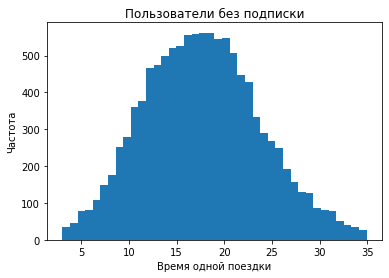

Text(0, 0.5, 'Частота')

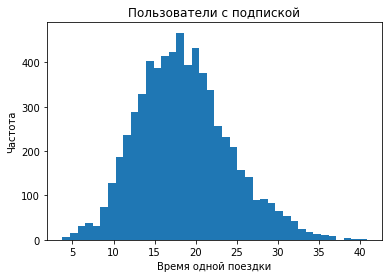

In [101]:
users_free['duration'].plot(kind='hist', bins=40, 
title = 'Пользователи без подписки')
plt.xlabel('Время одной поездки')
plt.ylabel('Частота')
plt.show()
users_ultra['duration'].plot(kind='hist', bins=40, 
title = 'Пользователи с подпиской')
plt.xlabel('Время одной поездки')
plt.ylabel('Частота')

Пользователи без подписки в течение одной поездки в среднем проезжают от 12 до 23 минут, пользователи с подпиской - 18-20 минут.

В ходе объединения данных:
1) были объединены 3 датафрейма в один, а затем из одного датафрейма были выделены ещё два - с данными пользователей без подписки и с подпиской;

2) построены графики с данными о расстоянии и времени поездки для пользователей без подписки и с подпиской.

Пользователи без подписки чаще всего проезжают в течение одной поездки около 2500 метров, пользователи с подпиской больше - 3000 метров. Время на одну поездку у обеих категорий пользователей примерно одинаковое - около 18 минут.

#### Шаг 5. Подсчёт выручки

In [102]:
data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [103]:
data['duration'] = np.ceil(data['duration']) 

In [104]:
data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199


Создала датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдено суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [105]:
data_new = data.pivot_table(
    index=('user_id', 'month', 'start_ride_price', 'subscription_fee', 'minute_price', 'subscription_type'), 
    values=(
        'distance', 
        'duration'), 
    aggfunc=({'distance':{'count', 'sum'}, 
             'duration':'sum'})
)
data_new.columns= [
    'count', 'distance_sum', 
    'duration_sum']
data_new = data_new.reset_index()

В этот же датафрейм добавила столбец receipts с помесячной выручкой, которую принёс каждый пользователь. 

Выручка рассчитывалась по формуле: стоимость старта поездки ×  количество поездок + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах + стоимость подписки.

In [106]:
data_new['receipts'] = (data_new['start_ride_price'] * 
data_new['count']) + (data_new['minute_price'] * 
data_new['duration_sum']) + data_new['subscription_fee']
data_new.head(6)

,user_id,month,start_ride_price,subscription_fee,minute_price,subscription_type,count,distance_sum,duration_sum,receipts
0,1,1,0,199,6,ultra,2,7027.511294,42.0,451.0
1,1,4,0,199,6,ultra,1,754.159807,7.0,241.0
2,1,8,0,199,6,ultra,2,6723.470560,46.0,475.0
3,1,10,0,199,6,ultra,2,5809.911100,32.0,391.0
4,1,11,0,199,6,ultra,3,7003.499363,56.0,535.0
5,1,12,0,199,6,ultra,2,6751.629942,28.0,367.0


#### Шаг 6. Проверка гипотез

**6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.**

Здесь нужно сравнить среднее двух выборок.

Нулевая гипотеза: пользователи с подпиской и без тратят одинаковое время на поездку.
Альтернативная гипотеза:пользователи с подпиской тратят больше времени на поездки.

In [107]:
alpha = 0.05 

results = st.ttest_ind(users_ultra['duration'], users_free['duration'], alternative='greater')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: пользователи с подпиской тратят больше времени на поездки')
else:
    print('Не получилось отвергнуть нулевую гипотезу: пользователи с подпиской и без тратят одинаковое время на поездку') 

p-значение: 1.0660216324999745e-20
Отвергаем нулевую гипотезу: пользователи с подпиской тратят больше времени на поездки


**6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.**

Здесь нужно проверить одностороннюю гипотезу: проезжают ли пользователи с подпиской меньше 3130 метров.
Нулевая гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.
Альтернативная гипотеза: среднее расстояние одной поездки пользователей с подпиской превышает 3130 метров


In [108]:
alpha = 0.05

interested_value = 3130

results = st.ttest_1samp(users_ultra['distance'], 
interested_value, alternative='greater')

print('p-значение:', results.pvalue )

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: среднее расстояние одной поездки пользователей с подпиской превышает 3130 метров')
else:
    print('Не получилось отвергнуть нулевую гипотезу: среднее расстояние одной поездки пользователей с подпиской не превышает 3130 метров ')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу: среднее расстояние одной поездки пользователей с подпиской не превышает 3130 метров 


**6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.**

Здесь тоже нужно сравнить две выборки.

Нулевая гипотеза: помесячные выручки от пользователей с подпиской и без подписки равны.
Альтернативная гипотеза: помесячная выручка от пользователей с подпиской больше, чем от пользователей без подписки.

In [109]:
data_ultra = data_new.query('subscription_type=="ultra"')
data_free=data_new.query('subscription_type=="free"')


In [110]:
alpha = 0.05
results = st.ttest_ind(data_ultra['receipts'], 
data_free['receipts'], alternative='greater')
print('p-значение:', results.pvalue ) 

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: помесячная выручка от пользователей с подпиской больше, чем от пользователей без подписки')
else:
    print('Не получилось отвергнуть нулевую гипотезу: помесячные выручки от пользователей с подпиской и без подписки равны ')

p-значение: 1.6762276547034842e-31
Отвергаем нулевую гипотезу: помесячная выручка от пользователей с подпиской больше, чем от пользователей без подписки


**6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?**

Здесь нужно сравнивать парные (зависимые выборки): количество обращений до обновления сервера и после.

Для проверки этой гипотезы подойдет **t-критерий Стьюдента для зависимых выборок**.

Чтобы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых (парных) выборок в Python, применим метод scipy.stats.ttest_rel().

**В результате проверки гипотез не удалось отвергнуть следующие гипотезы:**

1) пользователи с подпиской тратят больше времени на поездки;

2) среднее расстояние одной поездки пользователей с подпиской не превышает 3130 метров;

3) помесячная выручка от пользователей с подпиской больше, чем от пользователей без подписки.

# Общий вывод

В ходе работы были выполнены следующие задачи:

1) Осуществлена предобработка данных: датафреймы проверены на наличие пропусков и дубликатов. Удалены явные дубликаты, изменен тип данных в столбце date на datetime. Обнаружены выбросы в данных.

2) Описана и визуализирована общая информация о пользователях и поездках, а также обработаны аномалии: cреди пользователей самокатов чаще встречаются молодые люди в возрасте 23-27 лет, без подписки. Люди старше 30 и меньше 18 встречаются реже. Среднее время сессии - 18-20 минут, расстояние, которое пользователь преодолевает за одну поездку - 3000 метров. Большинство пользователь из Пятигорска, на последнем месте - Москва.

3) Объединены данные о пользователях, поездках и подписках в один датафрейм. Созданы ещё два датафрейма из датафрейма: c данными о пользователях без подписки и с данными о пользователях с подпиской. Визуализирована информация о расстоянии и времени поездок для пользователей обеих категорий. Пользователи без подписки чаще всего проезжают в течение одной поездки около 2500 метров, пользователи с подпиской больше - 3000 метров. Среднее время сессии - 18-20 минут для пользователей с подпиской и 12-23 минуты для пользователей без подписки.

4) Создан датафрейм с агрегированными данными о поездках: найдены суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Подсчитана помесячная выручка, которую принёс каждый пользователь.

5) Проверено несколько гипотез: 

- тратят ли пользователи с подпиской больше времени на поездки;
- проезжает ли пользователи с подпиской за одну поездку среднее расстояние, которое не первышает 3130 метров?
- будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

В результате проверки не были отвергнуты следующие гипотезы:

1. пользователи с подпиской тратят больше времени на поездки;

2. среднее расстояние одной поездки пользователей с подпиской не превышает 3130 метров;

3. помесячная выручка от пользователей с подпиской больше, чем от пользователей без подписки.

Таким образом, несмотря на то, что пользователей без подписки больше, чем с подпиской, пользователи с подпиской приносят больше выгоды сервису, поэтому имеет смысл удерживать эту категорию + также мотивировать людей переходить на подписку.
